In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score


In [3]:
# ---------------------------------------------------------
# Function: Load + Encode Dataset
# ---------------------------------------------------------
def load_and_preprocess(path, target_col):
   
    df = pd.read_csv(path)

    print(f"\nLoaded: {path}")
    print("Initial Shape:", df.shape)
    print("Columns:", df.columns.tolist())
    print(df.head())
   
    # Separate features and labels
    X = df.drop(columns=[target_col])
    y = df[target_col]

    return X, y

# ---------------------------------------------------------
# 1. Load Training Data
# ---------------------------------------------------------
train_path = r"C:\Users\rakhi\Downloads\ecommerce_train_smote.csv"
X_train, y_train= load_and_preprocess(train_path, target_col="returned")

print("\nX_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)



Loaded: C:\Users\rakhi\Downloads\ecommerce_train_smote.csv
Initial Shape: (52156, 13)
Columns: ['category', 'price', 'discount', 'quantity', 'payment_method', 'delivery_time_days', 'region', 'total_amount', 'shipping_cost', 'profit_margin', 'customer_age', 'customer_gender', 'returned']
   category   price  discount  quantity  payment_method  delivery_time_days  \
0         4  341.15      0.00         4               0                   4   
1         3    5.05      0.10         1               2                   6   
2         6    2.31      0.05         2               1                   7   
3         5   44.85      0.00         5               4                   6   
4         1  292.03      0.00         2               2                   5   

   region  total_amount  shipping_cost  profit_margin  customer_age  \
0       3       1364.60          10.43         371.66            29   
1       3          4.54           3.18          -2.82            36   
2       1          4.39

In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)


# =========================================================
# TRAIN LOGISTIC REGRESSION
# =========================================================
model = LogisticRegression(
    penalty='l2',
    solver='liblinear',
    class_weight=None,
    random_state=42
)

print("\nTraining Logistic Regression...")
model.fit(X_train_scaled, y_train)



Training Logistic Regression...


LogisticRegression(random_state=42, solver='liblinear')

In [9]:
test_path = r"C:\Users\rakhi\Downloads\ecommerce_test.csv"
X_test,y_test = load_and_preprocess(test_path, target_col="returned")
X_test_scaled = scaler.transform(X_test)
# ---------------------------------------------------
# 8. Predictions
# ---------------------------------------------------
y_pred = model.predict(X_test_scaled)

# ---------------------------------------------------
# 9. Evaluation
# ---------------------------------------------------
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=['not_returned', 'returned'],digits=4))


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("\n========== LOGISTIC REGRESSION PERFORMANCE ==========")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))



Loaded: C:\Users\rakhi\Downloads\ecommerce_test.csv
Initial Shape: (6900, 13)
Columns: ['category', 'price', 'discount', 'quantity', 'payment_method', 'delivery_time_days', 'region', 'total_amount', 'shipping_cost', 'profit_margin', 'customer_age', 'customer_gender', 'returned']
   category   price  discount  quantity  payment_method  delivery_time_days  \
0         1  249.33      0.05         2               1                   4   
1         0   24.12      0.00         1               5                   7   
2         1  120.43      0.30         1               0                   4   
3         4  108.57      0.05         1               1                   5   
4         6    2.90      0.00         1               0                   4   

   region  total_amount  shipping_cost  profit_margin  customer_age  \
0       2        473.73           8.34          48.51            26   
1       1         24.12           3.15           7.70            27   
2       2         84.30        

D:\anaconda\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


ROC-AUC Score: 0.4343125425014464


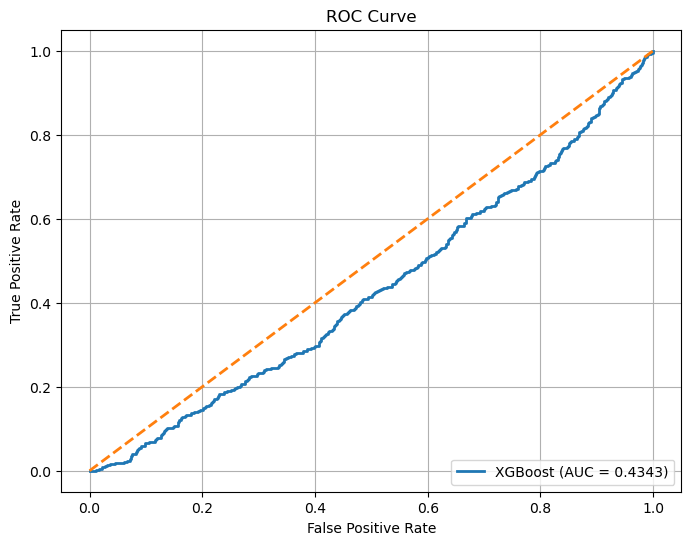

In [13]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# --------------------------------------------------------
# 1. Get predicted probabilities (for positive class = 1)
# --------------------------------------------------------
y_prob = model.predict_proba(X_test)[:, 1]

# --------------------------------------------------------
# 2. Compute ROC curve and AUC
# --------------------------------------------------------
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

print("ROC-AUC Score:", roc_auc)

# --------------------------------------------------------
# 3. Plot ROC Curve
# --------------------------------------------------------
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, lw=2, label=f"XGBoost (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], linestyle="--", lw=2)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()
